In [1]:
import graphviz

In [2]:
%load_ext autoreload
%autoreload 2
import sc2_flowcharts
sc2_flowcharts.f()

hello toto 1


In [9]:
sc2_flowcharts.f()

hello toto 1


In [10]:
d = graphviz.Digraph()
d

NameError: name 'graphviz' is not defined

In [7]:
d.node("1")
d.node("2")
d.edge("1", "2")

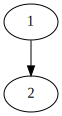

In [8]:
d

In [339]:
import re

def parse_step(step: str):
    target, step_type, step = _parse_step(step)
    res = [_color_step(step_type, step)]
    if target:
        res.append(f"<B>{_parse_time_or_supply(target)}</B>")
    res_formatted = "\n".join(f'<TD border="0" align="left">{s.strip()}</TD>' for s in res)
    return f'<TR>{res_formatted}</TR>'
    

def _parse_step(step: str) -> tuple:
    """
    Parse string with formats:
        `12 Build pool`
        `12 Build pool`
        `1:45 Build pool`
        `1:45 (12) Build pool`
    """
    ts_or_supply = r"(?:\d+:\d+)|(?:\d+)"
    step_type = r"(?: ?[BAS] )"
    reg = f"({ts_or_supply})?\s*?({step_type})?\s*?(.+)"
    match = re.match(reg, step)
    return match.groups()

def _parse_time_or_supply(group: str | None):
    if ":" in group:
        color = "firebrick"
    else:
        color = "darkgoldenrod3"
    return f'<FONT color="{color}">{group}</FONT>'

def _color_step(step_type: str|None, step: str):
    color = "black"
    step_type = (step_type or "").strip()
    if step_type == "S":
        color = "green"
    elif step_type == "A":
        color = "red"
    return f'<FONT color="{color}">{step}</FONT>'

In [340]:
class BuildGraph(graphviz.Digraph):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.last = None
        self.num_nodes = 0

    def node(self, name, *args, **kwargs):
        super().node(name, *args, **kwargs)
        self.num_nodes += 1
        self.last = name

    def nid(self):
        """Unique incrementing ID"""
        return f"{self.num_nodes + 1}"

In [341]:
def build_node(graph: BuildGraph, build: list[str], reaction: str=""):
    table_fstring = '<<TABLE cellpadding="0" cellspacing="0" align="left" border="0" cellborder="0">{}</TABLE>>'
    steps = map(parse_step, build)
    full_table = table_fstring.format("".join(steps))
    id1 = graph.nid()
    graph.node(id1, label=full_table, shape="box")
    if reaction:
        graph.node(graph.nid(), label=reaction, shape="ellipse", fillcolor="aquamarine", style="filled")
        graph.edge(id1, graph.last)
    return graph.last



In [1]:
from sc2_flowcharts.graph import BuildGraph

d = BuildGraph()
build = [
    "12 S Spawning Pool",
    "2:30 6 lings",
    "20 A Attack with lings",
    "Do stuff"
]
n1 = build_node(d, build, "Probe scout")
d

NameError: name 'build_node' is not defined

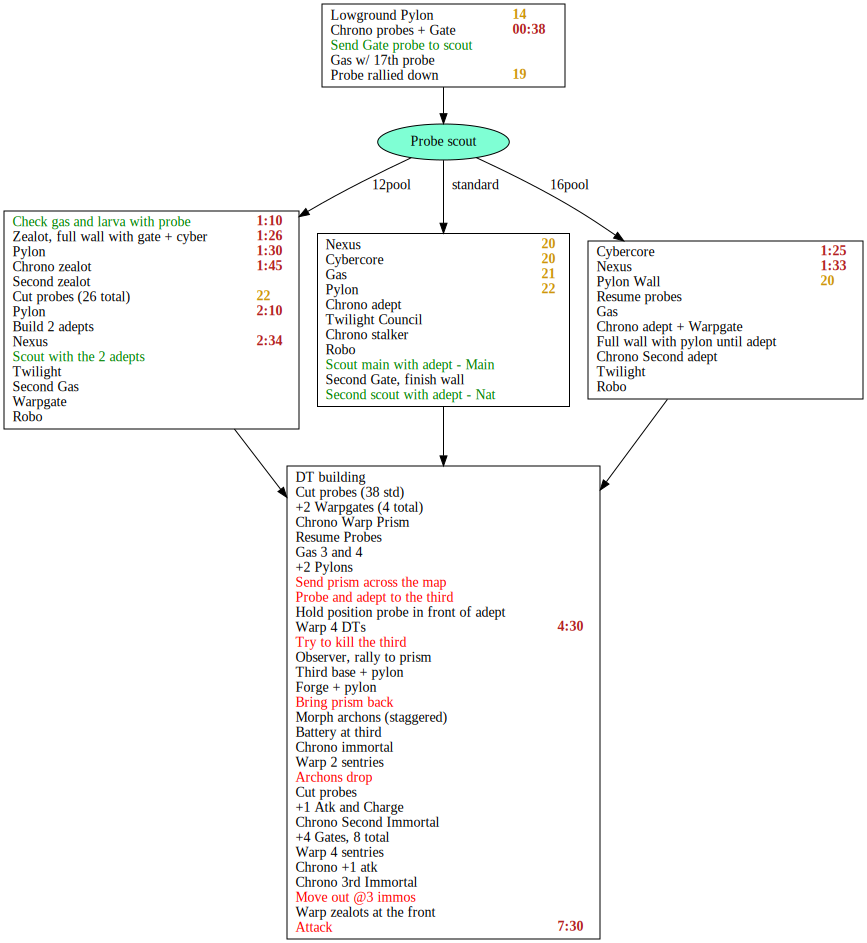

In [10]:
%autoreload 2
from sc2_flowcharts.graph import BuildGraph
opening = """
14 Lowground Pylon
00:38 Chrono probes + Gate
S Send Gate probe to scout
Gas w/ 17th probe
19 Probe rallied down
"""

twelvepool = """
1:10 S Check gas and larva with probe
1:26 Zealot, full wall with gate + cyber
1:30 Pylon
1:45 Chrono zealot
Second zealot
22 Cut probes (26 total)
2:10 Pylon
Build 2 adepts
2:34 Nexus
S Scout with the 2 adepts
Twilight
Second Gas
Warpgate
Robo
"""

sixteenpool = """
1:25 Cybercore
1:33 Nexus
20 Pylon Wall
Resume probes
Gas
Chrono adept + Warpgate
Full wall with pylon until adept
Chrono Second adept
Twilight
Robo
"""

standard = """
20 Nexus
20 Cybercore
21 Gas
22 Pylon
Chrono adept
Twilight Council
Chrono stalker
Robo
S Scout main with adept - Main
Second Gate, finish wall
S Second scout with adept - Nat
"""

standard_cont = """
DT building
Cut probes (38 std)
+2 Warpgates (4 total)
Chrono Warp Prism
Resume Probes
Gas 3 and 4
+2 Pylons
A Send prism across the map
A Probe and adept to the third
Hold position probe in front of adept
4:30 Warp 4 DTs
A Try to kill the third
Observer, rally to prism
Third base + pylon
Forge + pylon
A Bring prism back
Morph archons (staggered)
Battery at third
Chrono immortal
Warp 2 sentries
A Archons drop
Cut probes
+1 Atk and Charge
Chrono Second Immortal
+4 Gates, 8 total
Warp 4 sentries
Chrono +1 atk
Chrono 3rd Immortal
A Move out @3 immos
Warp zealots at the front
7:30 A Attack
"""

d = BuildGraph()
n1 = d.build_node(opening, "Probe scout")
n3 = d.build_node(twelvepool)
n4 = d.build_node(standard)
n5 = d.build_node(sixteenpool)
n6 = d.build_node(standard_cont)
d.edge(n1, n3, label="12pool")
d.edge(n1, n4, label="standard")
d.edge(n1, n5, label="16pool")
d.edge(n4, n6)
d.edge(n3, n6)
d.edge(n5, n6)
d


In [347]:
d.render("PvZ-DT-Drop2", format="png")

'PvZ-DT-Drop2.png'